In [1]:
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd')

In [2]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(train_images, train_labels),(test_images,test_labels) = mnist.load_data()
train_images = train_images.reshape((-1,28,28,1))
test_images = test_images.reshape((-1,28,28,1))

train_images = train_images/255.
test_images = test_images/255.

valid_images, test_images, valid_labels, test_labels = train_test_split(test_images, test_labels,
                                                                        test_size=0.15, shuffle=True)

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [3]:
inputs = Input(shape=(28,28,1))
conv1 = Conv2D(32, (3,3), activation=tf.nn.relu)(inputs) # 32개필터, (3,3)필터shape
pool1 = MaxPool2D((2,2))(conv1)

conv2 = Conv2D(64, (3,3), activation=tf.nn.relu)(pool1)
pool2 = MaxPool2D((2,2))(conv2)

conv3 = Conv2D(64, (3,3), activation=tf.nn.relu)(pool2)
flatten = Flatten()(conv3)

dense4 = Dense(64, activation='relu')(flatten)
dropout4 = Dropout(rate=0.2)(dense4)
outputs= Dense(10, activation='softmax')(dropout4)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Metal device set to: Apple M1 Pro
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)         

2022-03-03 23:51:31.483230: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-03 23:51:31.483360: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_SAVE_FOLDER = '/Users/suchan/study/cnn_models/'
model_path = f"{MODEL_SAVE_FOLDER}mnist-{{epoch:d}}-{{val_loss:.5f}}-{{val_accuracy:.5f}}.hdf5"

# save best only = val_accuracy가 있는 값들 중 좋아진 경우에만 save
# save weight only = 모델의 weight값만 갖고옴
cb_checkpoint = ModelCheckpoint(filepath=model_path,
                                monitor='val_accuracy',
                                verbose=1,
                                save_best_only=True)

# patience = val_accuracy가 연속으로 n번 떨어지면 STOP
cb_early_stopping = EarlyStopping(monitor='val_accuracy', patience=6)

In [5]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
hist = model.fit(train_images, train_labels,
                 validation_data=(valid_images, valid_labels),
                 epochs=100, batch_size=200,
                 callbacks=[cb_checkpoint, cb_early_stopping])

Epoch 1/100


2022-03-03 23:51:31.650806: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  4/300 [..............................] - ETA: 5s - loss: 2.2551 - accuracy: 0.1950  

2022-03-03 23:51:31.910238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


300/300 [==============================] - ETA: 0s - loss: 0.3331 - accuracy: 0.8984

2022-03-03 23:51:35.932433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.97506, saving model to /Users/suchan/study/cnn_models/mnist-1-0.07651-0.97506.hdf5
300/300 [==============================] - 5s 14ms/step - loss: 0.3331 - accuracy: 0.8984 - val_loss: 0.0765 - val_accuracy: 0.9751
Epoch 2/100
299/300 [============================>.] - ETA: 0s - loss: 0.0906 - accuracy: 0.9725
Epoch 2: val_accuracy improved from 0.97506 to 0.98482, saving model to /Users/suchan/study/cnn_models/mnist-2-0.04677-0.98482.hdf5
300/300 [==============================] - 4s 13ms/step - loss: 0.0905 - accuracy: 0.9725 - val_loss: 0.0468 - val_accuracy: 0.9848
Epoch 3/100
297/300 [============================>.] - ETA: 0s - loss: 0.0618 - accuracy: 0.9809
Epoch 3: val_accuracy improved from 0.98482 to 0.98718, saving model to /Users/suchan/study/cnn_models/mnist-3-0.03659-0.98718.hdf5
300/300 [==============================] - 4s 13ms/step - loss: 0.0617 - accuracy: 0.9810 - val_loss: 0.0366 - val_accuracy: 0.9872
Epoch 4/100
299/

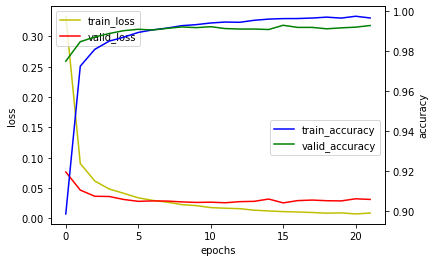

In [6]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='valid_loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['accuracy'], 'b', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='valid_accuracy')
acc_ax.set_xlabel('epochs')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right', bbox_to_anchor=(1, 0.5))

plt.show()

In [20]:
saved_path = ''

model.load_weights(saved_path)

print(f"Loss, Accuracy {model.evaluate(test_images,test_labels)}")

47/47 [==============================] - 1s 8ms/step - loss: 0.0185 - accuracy: 0.9953
Loss, Accuracy [0.018499553203582764, 0.9953333139419556]


In [24]:
saved_path = ''

loaded_model=tf.keras.models.load_model(saved_path)

print(f"Loss, Accuracy {loaded_model.evaluate(test_images,test_labels)}")

17/47 [=========>....................] - ETA: 0s - loss: 0.0214 - accuracy: 0.9963  

2022-03-03 11:20:07.256058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 0s 6ms/step - loss: 0.0185 - accuracy: 0.9953
Loss, Accuracy [0.018499553203582764, 0.9953333139419556]


# SUBCLASSING

In [33]:
class MNISTModel(Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = Conv2D(32, (3,3), activation='relu')
        self.pool1 = MaxPool2D()
        self.conv2 = Conv2D(64, (3,3), activation='relu')
        self.pool2 = MaxPool2D()
        self.conv3 = Conv2D(64, (3,3), activation='relu')
        self.flatten = Flatten()
        self.dense4 = Dense(64, activation='relu')
        self.dropout = Dropout(0.2)
        self.outputs = Dense(10, activation='softmax')
    
    # Forward
    def call(self, inputs, training=False):
        
        net = self.conv1(inputs)
        net = self.pool1(net)
        net = self.conv2(net)
        net = self.pool2(net)
        net = self.conv3(net)
        net = self.flatten(net)
        net = self.dense4(net)
        net = self.dropout(net)
        net = self.outputs(net)
        
        return net


In [26]:
model = MNISTModel()
inputs = Input(shape=(28,28,1))
model(inputs)

model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           multiple                  320       
                                                                 
 max_pooling2d_6 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          multiple                  18496     
                                                                 
 max_pooling2d_7 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          multiple                  36928     
                                                                 
 flatten_3 (Flatten)         multiple                  

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_SAVE_FOLDER = '/Users/suchan/study/cnn_models/'
model_path = f"{MODEL_SAVE_FOLDER}mnist-{{epoch:d}}-{{val_loss:.5f}}-{{val_accuracy:.5f}}.hdf5"

# save best only = val_accuracy가 있는 값들 중 좋아진 경우에만 save
# save weight only = 모델의 weight값만 갖고옴
cb_checkpoint = ModelCheckpoint(filepath=model_path,
                                monitor='val_accuracy',
                                verbose=1,
                                save_weights_only=True,
                                save_best_only=True)

# patience = val_accuracy가 연속으로 n번 떨어지면 STOP
cb_early_stopping = EarlyStopping(monitor='val_accuracy', patience=6)

In [30]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
hist = model.fit(train_images, train_labels,
                 validation_data=(valid_images, valid_labels),
                 epochs=100, batch_size=200,
                 callbacks=[cb_checkpoint, cb_early_stopping])

Epoch 1/100
  2/300 [..............................] - ETA: 19s - loss: 0.1269 - accuracy: 0.9650 

2022-03-03 11:35:20.262910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


296/300 [============================>.] - ETA: 0s - loss: 0.0827 - accuracy: 0.9754

2022-03-03 11:35:24.369884: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.98588, saving model to /Users/suchan/study/cnn_models/mnist-1-0.04322-0.98588.hdf5
300/300 [==============================] - 5s 14ms/step - loss: 0.0822 - accuracy: 0.9754 - val_loss: 0.0432 - val_accuracy: 0.9859
Epoch 2/100
297/300 [============================>.] - ETA: 0s - loss: 0.0522 - accuracy: 0.9839
Epoch 2: val_accuracy improved from 0.98588 to 0.98894, saving model to /Users/suchan/study/cnn_models/mnist-2-0.03716-0.98894.hdf5
300/300 [==============================] - 4s 14ms/step - loss: 0.0521 - accuracy: 0.9839 - val_loss: 0.0372 - val_accuracy: 0.9889
Epoch 3/100
300/300 [==============================] - ETA: 0s - loss: 0.0411 - accuracy: 0.9881
Epoch 3: val_accuracy did not improve from 0.98894
300/300 [==============================] - 4s 14ms/step - loss: 0.0411 - accuracy: 0.9881 - val_loss: 0.0378 - val_accuracy: 0.9876
Epoch 4/100
298/300 [============================>.] - ETA: 0s - loss: 0.0345 - accuracy: 0.9895


In [32]:
saved_path = '/Users/suchan/study/cnn_models/mnist-13-0.02707-0.99329.hdf5'

model.load_weights(saved_path)

print(f"Loss, Accuracy {model.evaluate(test_images,test_labels)}")

47/47 [==============================] - 0s 6ms/step - loss: 0.0206 - accuracy: 0.9927
Loss, Accuracy [0.02063010260462761, 0.9926666617393494]
